In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph 
from matplotlib import cm 
import matplotlib as mpl
import matplotlib.font_manager as fm
import operator

In [2]:
url = "https://n.news.naver.com/article/016/0002070444"


In [3]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
webpage = requests.get(f"{url}",headers=headers)
soup = BeautifulSoup(webpage.content,"html.parser")
title=soup.title.string
content=soup.find('div',attrs={'id':'dic_area'})
content=content.get_text().replace("\n","").replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}","").replace("\t","").replace(".",". ")

In [4]:
content

'서울 시내에서 배달 오토바이들이 운행 중이다.  김민지 기자[헤럴드경제=김민지 기자] “치킨 배달 시켰더니 1시간 30분 걸렸다?”우루과이전 당일 배달의민족, 요기요에 음식 배달이 몰리면서 배달이 크게 지연되거나 심지어 배달 거절 사례까지 발생했다.  반면 배달 기사들이 파업을 예고한 쿠팡이츠는 오히려 배달이 양호했던 것으로 나타났다.  월드컵 ‘배달 대란’ 우려를 낳았던 쿠팡이츠 배달 파업이 결국 ‘용두사미’로 끝났다. 25일 업계에 따르면, 지난 24일 카타르 월드컵 우루과이전 당시 오후 8시 30분경 서울시 송파구에 위치한 같은 식당에서 피자·치킨을 배달의민족과 쿠팡이츠 앱을 통해 동시에 주문했다.  그 결과 배달 수령까지 배민은 81분, 쿠팡이츠는 28분이 걸렸다.  이용량이 많은 배달의민족과 요기요는 월드컵 배달 수요가 몰리며 배달이 지연됐다.  반면, 쿠팡이츠는 상대적으로 이용량이 적어 빠른 배달이 가능했던 것으로 보인다. 24일 월드컵 우루과이전 당시 배달의민족과 쿠팡이츠 배달 시간 비교.  [각 앱 갈무리]앞서 라이더유니온과 민주노총 서비스연맹 배달플랫폼 노조로 이뤄진 ‘쿠팡이츠 공동교섭단’은 배달수수료 인상을 요구하며 “월드컵 기간 쿠팡이츠의 모든 배달을 거부한다”며 “특히 24일 하루 종일 쿠팡이츠 배달 앱을 로그아웃하겠다”고 밝혔다.  파급력을 키우기 위해 배달 수요 폭증이 예상되는 한국 첫 월드컵 경기날을 선택했다.  노조는 “파업에 대해 라이더들의 응원이 이어지고 있고 조합원 뿐만 아니라 비조합원도 대거 참여할 것”이라며 배달 대란을 예고했다. 그러나 노조의 주장과 달리 파업에 동참한 라이더는 많지 않았다.  일부 라이더들 사이에서는 파업에 참여 배달기사가 100명 채 되지 않을 거라는 의견도 나온다.  예상 외로 라이더 배정이 원활하게 이뤄지며 쿠팡이츠 운영에 타격을 입히지 못했다.  노조 활동을 향한 불신이 영향을 끼친 것으로 보인다. 배달 오토바이.  임세준 기자쿠팡이츠 배달라이더로 근무 중인 A씨는 “파업은 배달라이더 처우를 개

In [5]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize

In [7]:
texts = content.split('.')
texts = [normalize(text, english=True, number=True) for text in texts]
print(texts)

['서울 시내에서 배달 오토바이들이 운행 중이다', '김민지 기자 헤럴드경제 김민지 기자 치킨 배달 시켰더니 1시간 30분 걸렸다 우루과이전 당일 배달의민족 요기요에 음식 배달이 몰리면서 배달이 크게 지연되거나 심지어 배달 거절 사례까지 발생했다', '반면 배달 기사들이 파업을 예고한 쿠팡이츠는 오히려 배달이 양호했던 것으로 나타났다', '월드컵 배달 대란 우려를 낳았던 쿠팡이츠 배달 파업이 결국 용두사미 로 끝났다', '25일 업계에 따르면 지난 24일 카타르 월드컵 우루과이전 당시 오후 8시 30분경 서울시 송파구에 위치한 같은 식당에서 피자 치킨을 배달의민족과 쿠팡이츠 앱을 통해 동시에 주문했다', '그 결과 배달 수령까지 배민은 81분 쿠팡이츠는 28분이 걸렸다', '이용량이 많은 배달의민족과 요기요는 월드컵 배달 수요가 몰리며 배달이 지연됐다', '반면 쿠팡이츠는 상대적으로 이용량이 적어 빠른 배달이 가능했던 것으로 보인다', '24일 월드컵 우루과이전 당시 배달의민족과 쿠팡이츠 배달 시간 비교', '각 앱 갈무리 앞서 라이더유니온과 민주노총 서비스연맹 배달플랫폼 노조로 이뤄진 쿠팡이츠 공동교섭단 은 배달수수료 인상을 요구하며 월드컵 기간 쿠팡이츠의 모든 배달을 거부한다 며 특히 24일 하루 종일 쿠팡이츠 배달 앱을 로그아웃하겠다 고 밝혔다', '파급력을 키우기 위해 배달 수요 폭증이 예상되는 한국 첫 월드컵 경기날을 선택했다', '노조는 파업에 대해 라이더들의 응원이 이어지고 있고 조합원 뿐만 아니라 비조합원도 대거 참여할 것 이라며 배달 대란을 예고했다', '그러나 노조의 주장과 달리 파업에 동참한 라이더는 많지 않았다', '일부 라이더들 사이에서는 파업에 참여 배달기사가 100명 채 되지 않을 거라는 의견도 나온다', '예상 외로 라이더 배정이 원활하게 이뤄지며 쿠팡이츠 운영에 타격을 입히지 못했다', '노조 활동을 향한 불신이 영향을 끼친 것으로 보인다', '배달 오토바이', '임세준 기자쿠팡이츠 배달라이더로 근무 중인 A씨는 파업은 배달라이더

In [8]:
!pip install konlpy
from konlpy.tag import Okt
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
dataset = []
for i in range(len(texts)) :
  okt_pos = Okt().pos(texts[i], norm =True, stem = True)
  dataset.append([x for x, y in okt_pos if y in ['Noun']])
  i = i+1
dataset[:3]

[['서울', '시내', '배달', '오토바이', '운행', '중이'],
 ['김민지',
  '기자',
  '헤럴드경제',
  '김민지',
  '기자',
  '치킨',
  '배달',
  '우루과이',
  '전',
  '당일',
  '배달',
  '민족',
  '기요',
  '음식',
  '배달',
  '배달',
  '크게',
  '지연',
  '심지어',
  '배달',
  '거절',
  '사례',
  '발생'],
 ['반면', '배달', '기사', '파업', '예고', '쿠팡', '츠', '오히려', '배달', '양호', '것']]

In [10]:
count = {}   #동시출현 빈도가 저장될 dict
for line in dataset:
    #하나의 문서에서 동일한 단어가 두번 나와도 두번의 동시출현으로 고려X
    words = list(set(line))   
    #한줄씩 읽어와서 단어별로 분리(unique한 값으로 받아오기)
    #split은 띄어쓰기를 단어로 구분하라는 함수 
    
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1  

In [11]:
count.get(("a", "b"),0) #a, b라는 key가 없을 때는 디폴트를 0으로 해라 
count

{('배달', '중이'): 1,
 ('배달', '시내'): 1,
 ('배달', '서울'): 1,
 ('배달', '운행'): 1,
 ('배달', '오토바이'): 2,
 ('시내', '중이'): 1,
 ('서울', '중이'): 1,
 ('운행', '중이'): 1,
 ('오토바이', '중이'): 1,
 ('서울', '시내'): 1,
 ('시내', '운행'): 1,
 ('시내', '오토바이'): 1,
 ('서울', '운행'): 1,
 ('서울', '오토바이'): 1,
 ('오토바이', '운행'): 1,
 ('기요', '배달'): 2,
 ('배달', '음식'): 1,
 ('배달', '지연'): 2,
 ('배달', '우루과이'): 3,
 ('거절', '배달'): 1,
 ('당일', '배달'): 1,
 ('배달', '사례'): 1,
 ('배달', '크게'): 1,
 ('김민지', '배달'): 1,
 ('배달', '심지어'): 1,
 ('배달', '치킨'): 2,
 ('배달', '헤럴드경제'): 1,
 ('발생', '배달'): 1,
 ('민족', '배달'): 4,
 ('기자', '배달'): 2,
 ('배달', '전'): 3,
 ('기요', '음식'): 1,
 ('기요', '지연'): 2,
 ('기요', '우루과이'): 1,
 ('거절', '기요'): 1,
 ('기요', '당일'): 1,
 ('기요', '사례'): 1,
 ('기요', '크게'): 1,
 ('기요', '김민지'): 1,
 ('기요', '심지어'): 1,
 ('기요', '치킨'): 1,
 ('기요', '헤럴드경제'): 1,
 ('기요', '발생'): 1,
 ('기요', '민족'): 2,
 ('기요', '기자'): 1,
 ('기요', '전'): 1,
 ('음식', '지연'): 1,
 ('우루과이', '음식'): 1,
 ('거절', '음식'): 1,
 ('당일', '음식'): 1,
 ('사례', '음식'): 1,
 ('음식', '크게'): 1,
 ('김민지', '음식'): 1,
 ('심지어', '음식'): 1,
 (

In [12]:
#dictionary형 자료형을 판다스 데이터프레임으로 만들어줌 
#orient=index를 넣어야 행으로 쭉 나열이 됨 
df=pd.DataFrame.from_dict(count, orient='index')
df.head()

,0
"(배달, 중이)",1
"(배달, 시내)",1
"(배달, 서울)",1
"(배달, 운행)",1
"(배달, 오토바이)",2


In [13]:
list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0], df.index[i][1],df[0][i]])

In [14]:
#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
df2.head()

,term1,term2,freq
0,배달,중이,1
1,배달,시내,1
2,배달,서울,1
3,배달,운행,1
4,배달,오토바이,2


In [15]:
#pandas 이용해서 sorting 하기 (디폴트가 오름차순이라서 false 꼭 써줘야 내림차순으로 나옴)
df3=df2.sort_values(by=['freq'],ascending=False)
df3 = df3.reset_index(drop=True)
df3.head()



,term1,term2,freq
0,츠,쿠팡,9
1,배달,츠,8
2,배달,쿠팡,8
3,배달,파업,7
4,배달,월드컵,6


In [16]:
#조건넣기, 빈도수 >=4
len((np.where(df3['freq']>=4))[0])

15

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [18]:
G=nx.Graph()
for i in range(len((np.where(df3['freq']>=4))[0])):
  G.add_edge(df3['term1'][i], df3['term2'][i],weight = int(df3['freq'][i]))

In [19]:
# Compute centralities for nodes.
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
dgr = nx.degree_centrality(G)
btw = nx.betweenness_centrality(G)
cls = nx.closeness_centrality(G)
pgr = nx.pagerank(G)                 # 페이지 랭크


In [20]:
# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1),reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1),reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

In [21]:
print("** degree **")
for x in range(6):
    print(sorted_dgr[x])

print("** betwenness **")
for x in range(6):
    print(sorted_btw[x])

print("** closeness **")
for x in range(6):
    print(sorted_cls[x])
print("pgr")
for x in range(6):
  print(sorted_pgr[x])

** degree **
('배달', 1.0)
('파업', 0.5)
('츠', 0.375)
('쿠팡', 0.375)
('월드컵', 0.375)
('노조', 0.375)
** betwenness **
('배달', 0.7142857142857142)
('파업', 0.03571428571428571)
('츠', 0.0)
('쿠팡', 0.0)
('월드컵', 0.0)
('노조', 0.0)
** closeness **
('배달', 1.0)
('파업', 0.6666666666666666)
('츠', 0.6153846153846154)
('쿠팡', 0.6153846153846154)
('월드컵', 0.6153846153846154)
('노조', 0.6153846153846154)
pgr
('배달', 0.269899220882211)
('파업', 0.12939244867511093)
('츠', 0.12373095324612468)
('쿠팡', 0.12373095324612468)
('노조', 0.08779353452926192)
('월드컵', 0.08732036089560835)


In [22]:
d = dict(G.degree)
low, *_, high = sorted(d.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Spectral)


In [23]:
weights = nx.get_edge_attributes(G,'weight').values()
weights = [(x*0.7)for x in weights]


In [24]:
options = {
     'with_labels': True,
     'font_weight': 'regular',
}
pr = nx.pagerank(G)
nsize = np.array([v for v in d.values()])
nsize = 5000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

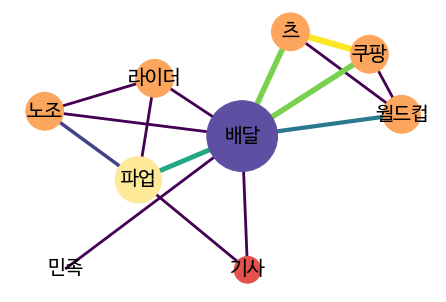

In [25]:
nx.draw(G, node_size=nsize, pos=nx.spring_layout(G, k=3.5, iterations=100), **options, font_family='NanumBarunGothic', font_size =20,
      node_color=[mapper.to_rgba(i) 
                    for i in d.values()],width = weights, edge_color= weights )  
plt.show()